In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("jester-data-1.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
df.shape

(24983, 101)

In [5]:
df.drop(0,axis=1,inplace=True)

In [6]:
# df.replace(99,np.nan,inplace=True)

In [7]:
print(df.shape)

(24983, 100)


In [8]:
# d={}
# for i in range(len(df.columns)):
#     d[i+1]=i
# df = df.rename(columns=d)

In [9]:
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
24981,99.00,99.00,99.00,99.00,-9.71,99.00,4.56,-8.30,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [10]:
def replace(orig, percentage=0.1):
    """
    Replaces 'percentage'% of the original values in 'orig' with 99's
    :param orig: original data array
    :param percentage: percentage of values to replace (0<percentage<1)
    """
    new_data = orig.copy()
    rated = np.where(new_data!=99)
    n_rated = len(rated[0])
    
    
    idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
    for i in idx:
        row=rated[0][i]
        col=rated[1][i]
        if(new_data[row,col]==np.nan):
            assert(True==False)
    
    new_data[rated[0][idx], rated[1][idx]] = 99
    return new_data, (rated[0][idx], rated[1][idx])

In [11]:
train_df, (r_rows,r_cols) = replace(df.values)

In [12]:
train_df.shape

(24983, 100)

In [13]:
n_latent_factors = 4

user_ratings = train_df
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [14]:
latent_item_features

array([[1.03883295e-01, 3.92273837e-01, 9.62551974e-01, 5.29210329e-01],
       [9.59558723e-01, 4.71342597e-01, 9.42525386e-01, 5.57088438e-01],
       [1.84411492e-01, 4.84265564e-01, 6.80883193e-01, 3.01867432e-01],
       [5.67442034e-01, 1.07735756e-01, 5.82938805e-01, 1.49914674e-01],
       [1.25128951e-01, 1.17861045e-01, 6.98188234e-01, 5.57317892e-01],
       [1.46093393e-01, 8.31813703e-01, 4.88753187e-01, 3.15798442e-02],
       [8.96876295e-01, 1.51014281e-01, 8.28392200e-01, 9.10785947e-01],
       [9.39360617e-01, 1.42892385e-01, 9.42274985e-01, 8.04679099e-01],
       [3.26882545e-01, 4.08178790e-01, 6.28908051e-01, 2.53277131e-01],
       [5.51139447e-01, 9.53561416e-01, 4.22986585e-01, 8.83957333e-01],
       [9.85765656e-01, 7.62943658e-01, 7.85584584e-01, 4.50060772e-01],
       [8.51897388e-01, 3.41548349e-01, 3.15284582e-01, 1.98129306e-03],
       [5.36676571e-01, 1.51026172e-01, 5.90787799e-01, 1.23544615e-01],
       [9.77305226e-01, 4.24425024e-01, 9.82833888e

In [15]:
latent_user_preferences

array([[0.24143602, 0.11127208, 0.8810083 , 0.76995881],
       [0.99026146, 0.03422419, 0.31940295, 0.301809  ],
       [0.75878019, 0.16383665, 0.81478242, 0.24648251],
       ...,
       [0.6602228 , 0.36447883, 0.36199832, 0.37364919],
       [0.22525408, 0.64514166, 0.13125034, 0.07583847],
       [0.31218913, 0.28181703, 0.75400989, 0.20892177]])

In [16]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not rating==99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [17]:

num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations


Iteration 0/100:	MSE=25.671978
Iteration 10/100:	MSE=23.916477
Iteration 20/100:	MSE=21.840742
Iteration 30/100:	MSE=18.016864
Iteration 40/100:	MSE=17.343398
Iteration 50/100:	MSE=17.066740
Iteration 60/100:	MSE=16.737808
Iteration 70/100:	MSE=16.317342
Iteration 80/100:	MSE=15.903081
Iteration 90/100:	MSE=15.599997


In [18]:
hist

[25.67197791818509,
 23.916476914689124,
 21.840741882502783,
 18.01686363288108,
 17.343397872941598,
 17.066739899085896,
 16.737808246648854,
 16.31734218506213,
 15.903080650803028,
 15.599997490699659]

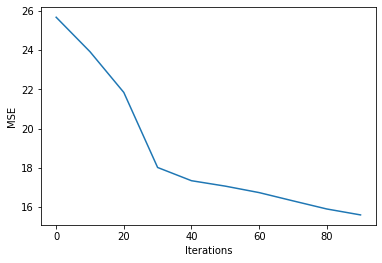

In [19]:
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [20]:
actual=[]
prediction=[]
n_validation=len(r_rows)

for i in range(n_validation):
    row=r_rows[i]
    col=r_cols[i]
    if(df.iloc[row,col]==99):
        assert(True==False)
    actual.append(df.iloc[row,col])
    prediction.append(predict_rating(row,col))    
mse=np.mean(np.square(np.subtract(prediction,actual)))
print(mse)

17.2252853795171


In [21]:
new_data = df.values.copy()
notrated = np.where(new_data==99)
n_notrated = len(notrated[0])
for i in range(len(notrated[0])):
    row=notrated[0][i]
    col=notrated[1][i]
    df.iloc[row,col]=predict_rating(row,col)

In [22]:
new_data = df.values.copy()
np.where(new_data==99)

(array([], dtype=int64), array([], dtype=int64))